In [24]:
using ModelingToolkit, Sophon, DomainSets
using Optimization, OptimizationOptimJL

@parameters x y
@variables u(..)
Dxx = Differential(x)^2
Dyy = Differential(y)^2

eq = Dxx(u(x, y)) + Dyy(u(x, y)) ~ 0

bcs = [u(-1, y) ~ 1,
       u(1, y) ~ 0,
       u(x, -1) ~ 50/75,
       u(x, 1) ~ 0]


# Space and time domains
domains = [x ∈ Interval(-1.0, 1.0),
           y ∈ Interval(-1.0, 1.0)]

@named pde_system = PDESystem([eq], bcs, domains, [x, y], [u(x, y)])

PDESystem
Equations: Equation[Differential(y)(Differential(y)(u(x, y))) + Differential(x)(Differential(x)(u(x, y))) ~ 0]
Boundary Conditions: Equation[u(-1, y) ~ 1, u(1, y) ~ 0, u(x, -1) ~ 0.6666666666666666, u(x, 1) ~ 0]
Domain: Symbolics.VarDomainPairing[Symbolics.VarDomainPairing(x, -1.0..1.0), Symbolics.VarDomainPairing(y, -1.0..1.0)]
Dependent Variables: Num[u(x, y)]
Independent Variables: Num[x, y]
Parameters: SciMLBase.NullParameters()
Default Parameter ValuesDict{Any, Any}()

In [25]:
chain = FullyConnected(2, 1, tanh; hidden_dims=20, num_layers=6)
pinn = PINN(chain)
sampler = QuasiRandomSampler(2000, 200)
strategy = NonAdaptiveTraining(1, 10)
prob = Sophon.discretize(pde_system, pinn, sampler, strategy)

OptimizationProblem. In-place: true
u0: ComponentVector{Float64}(layer_1 = (weight = [-0.9062318801879883 0.93593430519104; -0.522209644317627 -1.3223326206207275; … ; -1.911845326423645 -1.5321487188339233; -0.43629759550094604 -0.15970802307128906], bias = [0.0; 0.0; … ; 0.0; 0.0;;]), layer_2 = (weight = [0.6441393494606018 0.10598668456077576 … -0.22159533202648163 0.16871033608913422; -0.3870008587837219 0.5705342292785645 … 0.19368821382522583 0.2766816318035126; … ; 0.46211403608322144 0.3394051790237427 … -0.11117629706859589 -0.16786235570907593; 0.23933613300323486 0.12539352476596832 … -0.3184807002544403 0.01967969723045826], bias = [0.0; 0.0; … ; 0.0; 0.0;;]), layer_3 = (weight = [-0.2514708936214447 -0.2421545535326004 … -0.18750989437103271 0.5346493124961853; 0.06382148712873459 0.3718229830265045 … -0.39304691553115845 0.33742737770080566; … ; -0.4117743670940399 0.5693962574005127 … -0.37741729617118835 0.23135127127170563; 0.4032992422580719 -0.3693874776363373 … -0.3

In [29]:
function callback(p, l)
    println("Loss: $l")
    return false
end

res = Optimization.solve(prob, BFGS(); maxiters=2000, callback=callback)

Loss: 734.0989893362084


Loss: 501.33382366591553
Loss: 357.94385423106894


Loss: 267.9493356378049
Loss: 190.50825661364962


Loss: 136.1200752463741
Loss: 117.11254853632876


Loss: 94.99805086531873
Loss: 78.10372291660045


Loss: 62.752471014032615
Loss: 47.80138510725376


Loss: 37.103545402437895
Loss: 28.726068058178683


Loss: 21.152001644573577
Loss: 18.52008794447565


Loss: 14.222857130764885
Loss: 12.45299195706632
Loss: 10.18498940254797


Loss: 8.853596070426502
Loss: 7.514368293229249


Loss: 6.411079903341592
Loss: 5.603768804771864


Loss: 5.161146459995838
Loss: 4.701882108522362


Loss: 4.40332281159928
Loss: 4.106608669855323


Loss: 3.8603394813176344
Loss: 3.6386387567282283


Loss: 3.4496740114229336
Loss: 3.301414572361833


Loss: 3.17054908992102
Loss: 3.0606024748082095


Loss: 2.970355288537726
Loss: 2.8925099841917348


Loss: 2.8276988504842064
Loss: 2.7581979759903676


Loss: 2.6884905645711097
Loss: 2.6198942098768327


Loss: 2.5561569483279194
Loss: 2.502543468599768


Loss: 2.460756550837314
Loss: 2.4176377609616213


Loss: 2.376811241934917
Loss: 2.3401076973430435


Loss: 2.3060471222874144
Loss: 2.27367266322041


Loss: 2.2486272991698657
Loss: 2.23310822151936


Loss: 2.2129353859234215
Loss: 2.191132379963732


Loss: 2.175219603595224
Loss: 2.1587332615455748


Loss: 2.143439228518553
Loss: 2.126413893160084


Loss: 2.1078071824684246
Loss: 2.088077693104448


Loss: 2.066049571022266
Loss: 2.0439362183752308


Loss: 2.0237516051976927
Loss: 2.002822696770085


Loss: 1.9879534310093745
Loss: 1.9703862113490818


Loss: 1.9540067554378715
Loss: 1.935173201728165


Loss: 1.914347218616704
Loss: 1.8915848067674288


Loss: 1.8686275389219928
Loss: 1.8509010268321486


Loss: 1.8348589601158047
Loss: 1.8201420709184561


Loss: 1.8043047524501459
Loss: 1.7931929181788329


Loss: 1.7813103134471269
Loss: 1.7692587066126246


Loss: 1.7564277108558641
Loss: 1.7418333624371298


Loss: 1.7260030466197853
Loss: 1.7107894174995617


Loss: 1.694141250944904
Loss: 1.677408302371952


Loss: 1.6592759969001007
Loss: 1.644423590751979


Loss: 1.626311643421236
Loss: 1.609765412759629


Loss: 1.5938163791972555
Loss: 1.5789456905234838


Loss: 1.566407249206478
Loss: 1.5546025678930264


Loss: 1.545048173537436
Loss: 1.532922295171993


Loss: 1.5224162511667287
Loss: 1.511101966923623


Loss: 1.499312932959186
Loss: 1.486895641103899


Loss: 1.4746532604287004
Loss: 1.4616209145318966


Loss: 1.4484444793165059
Loss: 1.4345940676124112


Loss: 1.423494419741628
Loss: 1.4101387370583924


Loss: 1.400162078952175
Loss: 1.3901731872424947


Loss: 1.3805560120421247
Loss: 1.3720311558622997


Loss: 1.3625354713644182
Loss: 1.3545498714131556


Loss: 1.3467463037001046
Loss: 1.3392281568869422


Loss: 1.331611519375866
Loss: 1.323860404717084


Loss: 1.3150971081199723
Loss: 1.306148262137552


Loss: 1.2964283125276272
Loss: 1.2861131951082678


Loss: 1.2775185200678763
Loss: 1.2694563701400277


Loss: 1.2606450675253051
Loss: 1.255838435461809


Loss: 1.2485047373976133
Loss: 1.244101806876002


Loss: 1.2388981810758626
Loss: 1.233552056476051


Loss: 1.2276084724547396
Loss: 1.2212562829992337


Loss: 1.2143972776992373
Loss: 1.2069554138941934


Loss: 1.1992674957765677
Loss: 1.1914649206508092


Loss: 1.1834643267067904
Loss: 1.1760790660397347


Loss: 1.1702924872030973
Loss: 1.1651356070287022


Loss: 1.1590011540095284
Loss: 1.153935646070126


Loss: 1.1491803309888418
Loss: 1.1445043495124958


Loss: 1.1393874090194687
Loss: 1.1339263076816


Loss: 1.128110544435824
Loss: 1.1225967336769145


Loss: 1.1172340527804807
Loss: 1.1110398346524155


Loss: 1.1044852645800205
Loss: 1.0980063601982568


Loss: 1.0911061688577024
Loss: 1.0848572420312437


Loss: 1.078590416550824
Loss: 1.0729829719645223


Loss: 1.0676804582724675
Loss: 1.063110432303143


Loss: 1.0583597906718671
Loss: 1.0535168677841609


Loss: 1.0487498367109507
Loss: 1.0437609573470517


Loss: 1.0398354633140705
Loss: 1.035004385109795


Loss: 1.0305397247794281
Loss: 1.026916682392887


Loss: 1.0223552145693233
Loss: 1.0182397149498617


Loss: 1.0138052708698901
Loss: 1.0090194921467452


Loss: 1.003785289126665
Loss: 0.9983790759072764


Loss: 0.9933253586309365
Loss: 0.9877329800997114


Loss: 0.9821670657424867
Loss: 0.9765868226934755


Loss: 0.9711105156253391
Loss: 0.9655067210727877


Loss: 0.9601131426853915
Loss: 0.9546954844859927


Loss: 0.9485014129200633
Loss: 0.9417446450154034


Loss: 0.9343785295951135
Loss: 0.9266509460731909


Loss: 0.9195892791448379
Loss: 0.9136298502565172


Loss: 0.9086219300517352
Loss: 0.9049334214706871


Loss: 0.8991624653610956
Loss: 0.8949313544057713


Loss: 0.8912308297039367
Loss: 0.8867856770983119


Loss: 0.8834974197743117
Loss: 0.8802645094092083


Loss: 0.8770242494348599
Loss: 0.8737494860471302


Loss: 0.8708292229508308
Loss: 0.8677379983183766


Loss: 0.8645142369025031
Loss: 0.8611401336172275


Loss: 0.8581604648694967
Loss: 0.8553390359755608


Loss: 0.852326262786662
Loss: 0.8493164534753561


Loss: 0.8459319460585378
Loss: 0.8425705094038058


Loss: 0.8388700590211093
Loss: 0.8351008530835633


Loss: 0.8313140481002006
Loss: 0.8281524627786392


Loss: 0.8252948474246231
Loss: 0.8219691615931267


Loss: 0.818829080441567
Loss: 0.815695100874875


Loss: 0.8118458015660359
Loss: 0.8077864897413297


Loss: 0.803333147308515
Loss: 0.7984225995992721


Loss: 0.7928797613278402
Loss: 0.7883180006581693


Loss: 0.7836051927128034
Loss: 0.7789295357554826


Loss: 0.7743797464984314
Loss: 0.7705916175408384


Loss: 0.7662117246749648
Loss: 0.7632392943228682


Loss: 0.76043947366687
Loss: 0.7580169060727276


Loss: 0.7549122613160815
Loss: 0.7520758238998053


Loss: 0.7491712717405552
Loss: 0.7461524176134554


Loss: 0.7433513100883085
Loss: 0.7404720083640692


Loss: 0.7377192168979627
Loss: 0.7347743983094766


Loss: 0.7323268268226735
Loss: 0.7297337384860817


Loss: 0.726622859299898
Loss: 0.7235437354595121


Loss: 0.7203701260743925
Loss: 0.7168687668735645


Loss: 0.7135847122779957
Loss: 0.7100982772162401


Loss: 0.7075618239956306
Loss: 0.7044680562206969


Loss: 0.7015141932419838
Loss: 0.698695635024774


Loss: 0.6954452569082544
Loss: 0.6919569296185716


Loss: 0.6883728552224158
Loss: 0.6844859899520503


Loss: 0.6802521512990952
Loss: 0.6757823726656299


Loss: 0.6722399339068542
Loss: 0.6687828545749841


Loss: 0.665011376567473
Loss: 0.6622638135214868


Loss: 0.6601364078526029
Loss: 0.6571748971942881


Loss: 0.6547533129194761
Loss: 0.6522812786090668


Loss: 0.6496140392075546
Loss: 0.646767409745112


Loss: 0.6444994437547333
Loss: 0.6418846544876442


Loss: 0.6393342023513414
Loss: 0.6368726127304818


Loss: 0.634341720512194
Loss: 0.631816541366457


Loss: 0.6294448068675514
Loss: 0.6268044928090004


Loss: 0.624117348142136
Loss: 0.6215186667623736


Loss: 0.619053323589291
Loss: 0.6162665268991232


Loss: 0.6135808337104969
Loss: 0.6112991062896996


Loss: 0.6090263266521907
Loss: 0.6071504687597784


Loss: 0.6050645631840743
Loss: 0.6035729173278817


Loss: 0.6018417860585932
Loss: 0.5998688447965825


Loss: 0.5979157707260537
Loss: 0.5959284791560839


Loss: 0.5938644393906068
Loss: 0.5923648544810172


Loss: 0.5909200643128636
Loss: 0.5891456502455218


Loss: 0.5875879935496416
Loss: 0.5858148709657747


Loss: 0.583822667220379
Loss: 0.5816386127647034


Loss: 0.5793411426542836
Loss: 0.5774776027635259


Loss: 0.5756456778483305
Loss: 0.5739580485800884


Loss: 0.5723713734588436
Loss: 0.5707710952304464


Loss: 0.5692046916995435
Loss: 0.5676156881204908


Loss: 0.5660599335860135
Loss: 0.5642773663969693


Loss: 0.5622524399901276
Loss: 0.5599655178377679


Loss: 0.5574469415565833
Loss: 0.5546661793300768


Loss: 0.5519525840738659
Loss: 0.5507959086808327


Loss: 0.5482890334004524
Loss: 0.546720009478335


Loss: 0.5447374176698709
Loss: 0.5441241590445929


Loss: 0.542353309369595
Loss: 0.5415674546287481


Loss: 0.5402369181649838
Loss: 0.5397041048210753


Loss: 0.538712798184591
Loss: 0.5379288089709975


Loss: 0.5370215480252902
Loss: 0.5359615450100659


Loss: 0.5349474663356388
Loss: 0.5339444654614998


Loss: 0.5328835753392858
Loss: 0.5316947991002389


Loss: 0.5304732231786654
Loss: 0.5291321049583558


Loss: 0.527664538420149
Loss: 0.5262251810229989


Loss: 0.5251976129484167
Loss: 0.5236422832373583


Loss: 0.5222943371054722
Loss: 0.5209731525771031


Loss: 0.5196286946445361
Loss: 0.518257692262146


Loss: 0.5167883661537076
Loss: 0.5151771155602205


Loss: 0.5138299944543332
Loss: 0.5122854971303797


Loss: 0.510808995241311
Loss: 0.5092409646605186


Loss: 0.507543396542897
Loss: 0.5058861407554328


Loss: 0.5044996783055025
Loss: 0.504063104936306


Loss: 0.5022703582225292
Loss: 0.5013066328433645


Loss: 0.5004062051955647
Loss: 0.4993681329809275


Loss: 0.4982894779086302
Loss: 0.4972358875599673


Loss: 0.49612649133969033
Loss: 0.4951049515880433


Loss: 0.4938174604271357
Loss: 0.49248434849731604


Loss: 0.49115333454463667
Loss: 0.4896326613128522


Loss: 0.488054218296674
Loss: 0.4863548388574379


Loss: 0.48458124805605785
Loss: 0.484442338364416


Loss: 0.4835107641800551
Loss: 0.48199225885441294


Loss: 0.48079450703546717
Loss: 0.4801187223431067


Loss: 0.47938988729598464
Loss: 0.47880898134713723


Loss: 0.47819903914430667
Loss: 0.4776221189137959


Loss: 0.4768728983809016
Loss: 0.4761567759746471


Loss: 0.47542148398345263
Loss: 0.47461318740667957


Loss: 0.4737461338979778
Loss: 0.4728063245690292


Loss: 0.47183078944893525
Loss: 0.47084619151523704


Loss: 0.46975544439097133
Loss: 0.4686122792564035


Loss: 0.46752240371081955
Loss: 0.46610982685244184


Loss: 0.46471062703549354
Loss: 0.4632279849395492


Loss: 0.46190045340654956
Loss: 0.4613148434725434


Loss: 0.4597125445670086
Loss: 0.45864876282323974


Loss: 0.4575627602927493
Loss: 0.45651994515898336


Loss: 0.45535692384260174
Loss: 0.454253951282501


Loss: 0.45310379034236936
Loss: 0.45191756419021456


Loss: 0.4505916264890026
Loss: 0.44915708732594706


Loss: 0.4476820699993156
Loss: 0.4466369017588583


Loss: 0.44596460505151014
Loss: 0.44495320519812687


Loss: 0.44375478284280134
Loss: 0.4429127211180533


Loss: 0.44202197861901765
Loss: 0.4412167304129151


Loss: 0.4403000627000279
Loss: 0.43928979405567115


Loss: 0.4384242307259143
Loss: 0.437656897096913


Loss: 0.43681840881534517
Loss: 0.4359912119383702


Loss: 0.43514766212580586
Loss: 0.4342631666610386


Loss: 0.43344178926939797
Loss: 0.4325728469533064


Loss: 0.4316774320023657
Loss: 0.43081458936674494


Loss: 0.4302649910794924
Loss: 0.42940966680114606


Loss: 0.42863814148539153
Loss: 0.4278809211195077


Loss: 0.42701470023284305
Loss: 0.4262243603862359


Loss: 0.4253528416771079
Loss: 0.4246863530535271


Loss: 0.4238446299666646
Loss: 0.4230588588948672


Loss: 0.422270113472998
Loss: 0.4214405931566213


Loss: 0.4205433364102703
Loss: 0.4198474225322214


Loss: 0.4189443359622235
Loss: 0.41814887086186225


Loss: 0.4172656017729558
Loss: 0.41656473112404885


Loss: 0.415901636270032
Loss: 0.41508969854073663


Loss: 0.4142867953123754
Loss: 0.41339241545209304


Loss: 0.4124185116243655
Loss: 0.41141248336963715


Loss: 0.41058222151604284
Loss: 0.409873771835844


Loss: 0.40916227038504677
Loss: 0.40865285739715895


Loss: 0.40803918065230244
Loss: 0.40761705185442776


Loss: 0.4070561572016882
Loss: 0.4064944453502643


Loss: 0.40587162978153074
Loss: 0.40524776495424


Loss: 0.40463387041762894
Loss: 0.4039395782621662


Loss: 0.40321495310701666
Loss: 0.4024787471653064


Loss: 0.4017152539211691
Loss: 0.401067937705141


Loss: 0.40039776664093707
Loss: 0.3997564512885793


Loss: 0.39911786080790135
Loss: 0.3984540070861044


Loss: 0.3977526732564691
Loss: 0.39699791900082343


Loss: 0.39616610950341025
Loss: 0.3952626746304563


Loss: 0.39432582779087866
Loss: 0.39366442358069764


Loss: 0.39294543935360604
Loss: 0.39231753360039673


Loss: 0.3916107404080637
Loss: 0.390991475581092


Loss: 0.3903456095552108
Loss: 0.3896880243203694


Loss: 0.3889910095259366
Loss: 0.38827054382663995


Loss: 0.38778098167032327
Loss: 0.3871502060066495


Loss: 0.3866408740334239
Loss: 0.38613585419543994


Loss: 0.3856000354595763
Loss: 0.3850584950038191


Loss: 0.3844873642117155
Loss: 0.38385000449407364


Loss: 0.38320128532016084
Loss: 0.38253823780877066


Loss: 0.3820172167186817
Loss: 0.38133567594287016


Loss: 0.3806925773895766
Loss: 0.3801155362837484


Loss: 0.379565465807676
Loss: 0.37907923807786115


Loss: 0.37865409422831586
Loss: 0.378120113443266


Loss: 0.37768053609440627
Loss: 0.3772053097507165


Loss: 0.37675616989716343
Loss: 0.3762548054966729


Loss: 0.37575311227542946
Loss: 0.3751861585639817


Loss: 0.37458039044758873
Loss: 0.37397743201893874


Loss: 0.3732741500425139
Loss: 0.3725772171897328


Loss: 0.37196000029984866
Loss: 0.37147246855328675


Loss: 0.370832066025674
Loss: 0.3702996243873962


Loss: 0.36976926949236455
Loss: 0.3691438679306088


Loss: 0.368495168814175
Loss: 0.36788221672022675


Loss: 0.3671738631004551
Loss: 0.3665832033202572


Loss: 0.36595069637970734
Loss: 0.36530659234840446


Loss: 0.36475088748215234
Loss: 0.3642938136338799


Loss: 0.36376206046173226
Loss: 0.36328887131003873


Loss: 0.3627853986857218
Loss: 0.3623948255020446


Loss: 0.3619225203310283
Loss: 0.3614861312051499


Loss: 0.3610066580723146
Loss: 0.36050409100092473


Loss: 0.35995330773470824
Loss: 0.35933259087054975


Loss: 0.35862508870798854
Loss: 0.3579206842081448


Loss: 0.3574153861629611
Loss: 0.35667082974954334


Loss: 0.3561079927821157
Loss: 0.3555910888323552


Loss: 0.35509178600456537
Loss: 0.35479974837642747


Loss: 0.35445864393218807
Loss: 0.3540089780461622


Loss: 0.3536476527782475
Loss: 0.35322309920777106


Loss: 0.35280944009451565
Loss: 0.3524240562724936


Loss: 0.3520206239473769
Loss: 0.3515470859714985


Loss: 0.3510773892150364
Loss: 0.35057889063119746


Loss: 0.3501403266957903
Loss: 0.34970483672290115


Loss: 0.3492298776724336
Loss: 0.3487261976042813


Loss: 0.3482013679080748
Loss: 0.34764518159232727


Loss: 0.34716569007633097
Loss: 0.3468361429583708


Loss: 0.34645369464453746
Loss: 0.3460527614508195


Loss: 0.3457385684287185
Loss: 0.34534320531490487


Loss: 0.34492396071475273
Loss: 0.3444561125952732


Loss: 0.34394646771770837
Loss: 0.34349221270355645


Loss: 0.34327572788444993
Loss: 0.3428184539406759


Loss: 0.3425387418010366
Loss: 0.3422574844595939
Loss: 0.3419347301414615


Loss: 0.34161990860659597
Loss: 0.34127389805341335


Loss: 0.34091909850903634
Loss: 0.340577832689116


Loss: 0.34032766712549195
Loss: 0.33992269325074237


Loss: 0.33957028821609514
Loss: 0.3392185105134505


Loss: 0.33894336205231435
Loss: 0.3386084164615274


Loss: 0.338323371993543
Loss: 0.3380354027152072


Loss: 0.33774023694560895
Loss: 0.33743459785151475


Loss: 0.3371403342623287
Loss: 0.33685329865610464


Loss: 0.33657162610372815
Loss: 0.3362638888211794


Loss: 0.33595075333183655
Loss: 0.33565829625441523


Loss: 0.3353634897594101
Loss: 0.3350563513767492


Loss: 0.3347359343943329
Loss: 0.3343967381867923


Loss: 0.3341066105295901
Loss: 0.3338005945325118


Loss: 0.33347035135748065
Loss: 0.33310978873344216


Loss: 0.3327078233774618
Loss: 0.3322604338902033


Loss: 0.3318305432337283
Loss: 0.33138909881535394


Loss: 0.33106974473731327
Loss: 0.33071093835963067


Loss: 0.33025304573220066
Loss: 0.329897163330196


Loss: 0.329554158129832
Loss: 0.32918937599505915


Loss: 0.32886091137317575
Loss: 0.3285787626703438


Loss: 0.3283027488375983
Loss: 0.32799786941274245


Loss: 0.327729144404177
Loss: 0.3274555727056211


Loss: 0.3271632870005308
Loss: 0.3268420745548148


Loss: 0.32649428537069514
Loss: 0.3261741343906941


Loss: 0.32585826570866694
Loss: 0.32554541142213517


Loss: 0.32526041947847306
Loss: 0.3249609863620351


Loss: 0.3247090530791882
Loss: 0.3244598539086283


Loss: 0.32420204407248254
Loss: 0.32395723580640645


Loss: 0.32369398093510904
Loss: 0.3234305917864774


Loss: 0.3231563889922091
Loss: 0.32286852693982787


Loss: 0.3225695920409585
Loss: 0.3222479059707057


Loss: 0.3219230604235323
Loss: 0.32164805036768696


Loss: 0.32138413462331916
Loss: 0.32107380021299675


Loss: 0.32078080651083135
Loss: 0.3204601082488567


Loss: 0.3201130496212549
Loss: 0.31978920149755785


Loss: 0.31946570766433346
Loss: 0.3191870002710179


Loss: 0.3188869119741297
Loss: 0.31867846004379574


Loss: 0.31840176924443897
Loss: 0.3181713278404309


Loss: 0.31793013252299035
Loss: 0.31770336818914063


Loss: 0.317516598591244
Loss: 0.3173005459560413


Loss: 0.3170750612482742
Loss: 0.31682273929292876


Loss: 0.3165453246794748
Loss: 0.3162641824293345


Loss: 0.31596595657850335
Loss: 0.315682105890103


Loss: 0.315429560688007
Loss: 0.31518221860260226


Loss: 0.31493299989660734
Loss: 0.3147646298734918


Loss: 0.31449795232798405
Loss: 0.31427254454516246


Loss: 0.3140293703340445
Loss: 0.3137744355928247


Loss: 0.3135444121961619
Loss: 0.31327959040003694


Loss: 0.31303178516312397
Loss: 0.31274560701385923


Loss: 0.31248981169314766
Loss: 0.31220741204762087


Loss: 0.3119104035544735
Loss: 0.3117645350055851


Loss: 0.31144596157343246
Loss: 0.3112145314033323


Loss: 0.31093244991519947
Loss: 0.3106411328493633


Loss: 0.3103204647957492
Loss: 0.31001507135909945


Loss: 0.30970738753486704
Loss: 0.30945247266366854


Loss: 0.3092202606116825
Loss: 0.3089349908288883


Loss: 0.30869409210661386
Loss: 0.3084461443705324


Loss: 0.3082349381139489
Loss: 0.3079533567350018


Loss: 0.3076995191674925
Loss: 0.30746149969412395


Loss: 0.3073390085352893
Loss: 0.30709065808035474


Loss: 0.3069179048020899
Loss: 0.30672683721744065


Loss: 0.30651856003269107
Loss: 0.3062810351530554


Loss: 0.3060144999497301
Loss: 0.3057201581497656


Loss: 0.30542364263202376
Loss: 0.3051670223634173


Loss: 0.30494014677739567
Loss: 0.30469380629606635


Loss: 0.30444079390835077
Loss: 0.3041838982395946


Loss: 0.30391135708151
Loss: 0.3036524124077376


Loss: 0.30335782791821686
Loss: 0.30321991079881133


Loss: 0.30293080547613027
Loss: 0.3029396978811747


Loss: 0.3027350249779305
Loss: 0.30248952858815115


Loss: 0.3023756723599316
Loss: 0.3022340326864959


Loss: 0.3020921236841554
Loss: 0.3019241960825355


Loss: 0.30173723868452185
Loss: 0.3015217487937909


Loss: 0.30127632488068634
Loss: 0.30100039028663245


Loss: 0.30070564887994766
Loss: 0.3005918555779378


Loss: 0.30028608545921626
Loss: 0.30009334750856514


Loss: 0.29992893697081313
Loss: 0.29978346852418236


Loss: 0.2996250035339589
Loss: 0.29944732048736555


Loss: 0.29926365136462074
Loss: 0.29905644626212485


Loss: 0.29883647042039085
Loss: 0.2986475318994811


Loss: 0.29843541590346034
Loss: 0.29824797450025925


Loss: 0.29813243176138954
Loss: 0.2979163581466216


Loss: 0.29774688478677447
Loss: 0.29756336636900854


Loss: 0.2973710942254528
Loss: 0.29716482603976396


Loss: 0.29696057114432833
Loss: 0.29678685094932944


Loss: 0.2966327049249215
Loss: 0.2964606102204318


Loss: 0.29630432780815386
Loss: 0.2961510019605725


Loss: 0.2959855902961463
Loss: 0.2958080300423251


Loss: 0.2956110686673104
Loss: 0.2954054077545901


Loss: 0.2952044673870544
Loss: 0.29501686965380325


Loss: 0.2948663094558866
Loss: 0.2946894122280708


Loss: 0.2945348248079704
Loss: 0.2943673956311114


Loss: 0.294200708513179


Loss: 0.2940174008099119


Loss: 0.293826568193826
Loss: 0.29364236356994783


Loss: 0.29345793921464225
Loss: 0.2932671116560659


Loss: 0.2930746037857991
Loss: 0.2929323241418373


Loss: 0.29274275455921733
Loss: 0.29257204892905553


Loss: 0.29239653586319625
Loss: 0.29221181423892384


Loss: 0.29204266821412983
Loss: 0.29185764179219037


Loss: 0.2916593404681994
Loss: 0.2914816852217011


Loss: 0.2912809936159705
Loss: 0.2910955788658156


Loss: 0.29091075176934234
Loss: 0.29071887985603984


Loss: 0.290595460923058
Loss: 0.2904581883461856


Loss: 0.29030338400580363
Loss: 0.2901353278079548


Loss: 0.2899701534019482
Loss: 0.2897891303239404


Loss: 0.28958965697045225
Loss: 0.2893584877143942


Loss: 0.28910427991849486
Loss: 0.2888668350560605


Loss: 0.28863571759886897
Loss: 0.28844609708886915


Loss: 0.2882534200156677
Loss: 0.2880999448056223


Loss: 0.2879546625823304
Loss: 0.2878027056749919


Loss: 0.2876395204424417
Loss: 0.2874678308906158


Loss: 0.2872752915454162
Loss: 0.2870593083432778


Loss: 0.2868301206343768
Loss: 0.28663101138517083


Loss: 0.2865045501040207
Loss: 0.28626207308324786


Loss: 0.2861199947128601
Loss: 0.28593347254768625


Loss: 0.2857711507847493
Loss: 0.28559435171925984


Loss: 0.28539978537124905
Loss: 0.2851798644357064


Loss: 0.2849447284624802
Loss: 0.28474305493500845


Loss: 0.28458453121797617
Loss: 0.2844534996945659


Loss: 0.28426090210823785
Loss: 0.2841288433982718


Loss: 0.28398554978463
Loss: 0.2838311255237271


Loss: 0.28370154171700795
Loss: 0.2835553411506004


Loss: 0.28342099683425276
Loss: 0.283263104470818


Loss: 0.28309126301728726
Loss: 0.2829411257710662


Loss: 0.28280416863822055
Loss: 0.28264857386377595


Loss: 0.28250042983846013
Loss: 0.2823398180475389


Loss: 0.2821600077244953
Loss: 0.2819781492305067


Loss: 0.2818270127970872
Loss: 0.28166852626933875


Loss: 0.28153503825299087
Loss: 0.2814057667847267


Loss: 0.28128680210983403
Loss: 0.28116164531830184


Loss: 0.2810141474945066
Loss: 0.28089770599597386


Loss: 0.28076407571274686
Loss: 0.2806443840362383


Loss: 0.28051198371466907
Loss: 0.28038335011243476


Loss: 0.28024099278622117
Loss: 0.28008256793819586


Loss: 0.27993657654286797
Loss: 0.27980150011607785


Loss: 0.27966093013996307
Loss: 0.2795293665654894


Loss: 0.2793838098348482
Loss: 0.27922015033081005


Loss: 0.27903599591281864
Loss: 0.27884464494211597


Loss: 0.27868929744727106
Loss: 0.27851945847941323


Loss: 0.2783709174206524
Loss: 0.278224197492859


Loss: 0.2780807531847437
Loss: 0.2779456668741027


Loss: 0.27780678905531725
Loss: 0.2776589459872756


Loss: 0.2775357430044044
Loss: 0.27741622148510725


Loss: 0.2772898589182868
Loss: 0.2771705638966315


Loss: 0.27704108470420175
Loss: 0.2768905754825103


Loss: 0.2767356826532792
Loss: 0.2766007061060973


Loss: 0.2764675675697553
Loss: 0.2763332377103171


Loss: 0.27624152380364564
Loss: 0.27610989650863976


Loss: 0.2759988520818415
Loss: 0.27587248868269976


Loss: 0.27573119594868395
Loss: 0.2755748598886558


Loss: 0.2753994762379147
Loss: 0.2752249584457833


Loss: 0.2750985451259372
Loss: 0.27492065391126963


Loss: 0.27478543029668545
Loss: 0.2746465981843913


Loss: 0.27451047132925854
Loss: 0.27439325253741825


Loss: 0.27425780660133336
Loss: 0.27419087362469197


Loss: 0.27405433699838183
Loss: 0.273941905449537


Loss: 0.2738456898056469
Loss: 0.27373960963821115


Loss: 0.2736456639728389
Loss: 0.2735415587768416


Loss: 0.2734338232958755
Loss: 0.2733151659621698


Loss: 0.2731777051082147
Loss: 0.27302032998022235


Loss: 0.27284476480759295
Loss: 0.2726534880279424


Loss: 0.27248790835951
Loss: 0.2723104453386748


Loss: 0.27214715110768123
Loss: 0.2720094035596444


Loss: 0.27183586801520776
Loss: 0.27167341048154703


Loss: 0.2715360059667186
Loss: 0.27140350354479104


Loss: 0.2712677154887638
Loss: 0.27115544674359676


Loss: 0.271046802894982
Loss: 0.27094932233488334


Loss: 0.27084139427152526
Loss: 0.2707340145497665


Loss: 0.2706422646521554
Loss: 0.2705386343927755


Loss: 0.2704302051682189
Loss: 0.27030689370912264


Loss: 0.27017667338720475
Loss: 0.2700511112628903


Loss: 0.2699484207546997
Loss: 0.2698261166755761


Loss: 0.2697378311801769
Loss: 0.269621540276543


Loss: 0.269521457194645
Loss: 0.2694055478799814


Loss: 0.2692866817583964
Loss: 0.2691577429473219


Loss: 0.2690284002280565
Loss: 0.26889777275723076


Loss: 0.2687760019349717
Loss: 0.2686627073037255


Loss: 0.26856207859569403
Loss: 0.26847011473869375


Loss: 0.2683604266371347
Loss: 0.26825460523606864


Loss: 0.26815320479071447
Loss: 0.2680386728147034


Loss: 0.267921175453834
Loss: 0.2678161940087523


Loss: 0.2677210720950684
Loss: 0.2675979455725175


Loss: 0.26749353685249616
Loss: 0.26739014199019767


Loss: 0.2672955549681309
Loss: 0.26719547246830794


Loss: 0.2670973696143205
Loss: 0.2669856519616842


Loss: 0.2668655529825511
Loss: 0.2667247211215111


Loss: 0.26661317305952925
Loss: 0.26644848278144373


Loss: 0.26633534270627957
Loss: 0.2662419251578383


Loss: 0.26612605327399413
Loss: 0.2659938476177392


Loss: 0.2658778327169468
Loss: 0.26578103322311397


Loss: 0.2656791685649483
Loss: 0.2655706742901551


Loss: 0.2654636602964628
Loss: 0.2653480714827503


Loss: 0.26523776164846835
Loss: 0.26512165143725586


Loss: 0.26500483747491244
Loss: 0.26488145796041407


Loss: 0.2647573306517776
Loss: 0.2646334141691873


Loss: 0.2645059718823163
Loss: 0.26441113535967736


Loss: 0.2642824928943699
Loss: 0.26419868639255484


Loss: 0.2640923942960495
Loss: 0.26399129899294155


Loss: 0.2638747474150648
Loss: 0.2637453840387977


Loss: 0.2636085119065736
Loss: 0.26347005707662036


Loss: 0.2633331327988271
Loss: 0.2632150549891864


Loss: 0.26310935535167557
Loss: 0.2629943885416176


Loss: 0.26288281247176915
Loss: 0.26278245405165407


Loss: 0.26266242952077373
Loss: 0.2625377349439512


Loss: 0.26241226380389726
Loss: 0.26229144755047057


Loss: 0.26216274455927024
Loss: 0.262062528921103


Loss: 0.2619580292546315
Loss: 0.2618718669109431


Loss: 0.2617694706588434
Loss: 0.2616656111986997


Loss: 0.26155438652972857
Loss: 0.26144319332218263


Loss: 0.26131527120382175
Loss: 0.26117307156818836


Loss: 0.2610211403145724
Loss: 0.2608572237021733


Loss: 0.2607054556690916
Loss: 0.26059195586225464


Loss: 0.26047524174330666
Loss: 0.26034637681361417


Loss: 0.2602392854612643
Loss: 0.2601483856920424


Loss: 0.2600440601639297
Loss: 0.25993667052667635


Loss: 0.2598181179177269
Loss: 0.25970014131851504


Loss: 0.2595754643930099
Loss: 0.2594471119067952


Loss: 0.259335944838134
Loss: 0.2592357447451229


Loss: 0.2591311810501937
Loss: 0.25906586596055214


Loss: 0.25897481210495354
Loss: 0.2589055823173543


Loss: 0.2588210232918211
Loss: 0.25873616102590613


Loss: 0.25865409230015146
Loss: 0.25865409230015146


u: ComponentVector{Float64}(layer_1 = (weight = [-0.9220341904911239 0.9264604421363973; -0.5217340523526308 -1.3244438475894031; … ; -1.6676531887495947 -1.5525623367230825; -0.4357117797287566 -0.15689682114900028], bias = [0.011571217393268501; -0.0003925940101196953; … ; 0.0002616298086506489; -0.0016048943607827424;;]), layer_2 = (weight = [0.6402116435966337 0.10897612183095497 … -0.2277781032025506 0.15322926333616038; -0.39038755401066744 0.567325012692526 … 0.1861953540472262 0.05257871951032286; … ; 0.4750111988611404 0.4198936540219279 … -0.12104140605968916 -0.20208176943844644; 0.25225296065390473 0.15702740749013588 … -0.27548652086197495 0.040007512459149804], bias = [-0.00046390968087059524; -0.001631397687299087; … ; -0.005655643750864914; 0.0020118614174872017;;]), layer_3 = (weight = [-0.2531578965503016 -0.24153572114308916 … -0.1872641241127513 0.5335709861234532; 0.06396108583871589 0.36813971699535347 … -0.43610365635092774 0.3406054296854093; … ; -0.408316394323

In [ ]:
using ProgressMeter
@showprogress reduce(1:10) do x, y
    sleep(0.1)
    x + y
end

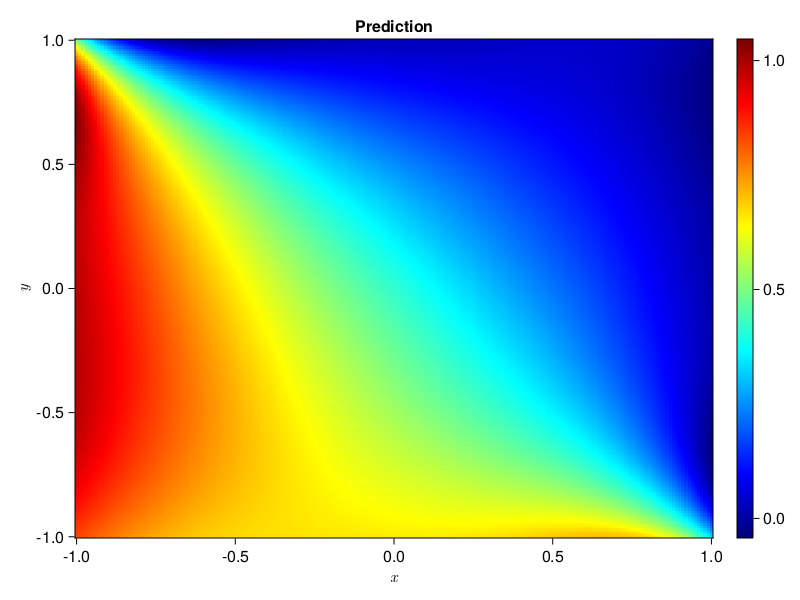

In [30]:
using CairoMakie, MakiePublication

phi = pinn.phi
xs, ys = [infimum(d.domain):0.01:supremum(d.domain) for d in pde_system.domain]
axis = (xlabel=L"x", ylabel=L"y", title="Prediction")
u_pred = [sum(pinn.phi([x, y], res.u)) for x in xs, y in ys]
fig, ax, hm = heatmap(xs, ys, u_pred, axis=axis, colormap=:jet)
Colorbar(fig[1,2], hm)
fig